# Lab 12: Ordinary differential equations (2)

In this lab we'll continue to explore the use of `solve_ivp` to solve differential equations. In particular, we will look at *anharmonic* oscillators, which occur frequently throughout physics but have more complicated solutions than  familiar simple harmonic motion.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
#from scipy.integrate import odeint
%matplotlib notebook

## Anharmonic oscillator, version 1: asymmetric potential

First, consider the following potential:

$$\begin{align}
V(x) &= \tfrac12 k x^2(1 - \tfrac23 \alpha x) \\
F(x) &= -\frac{\mathrm dV}{\mathrm dx} = -kx(1 - \alpha x) \\
m\frac{\mathrm d^2x}{\mathrm dt^2} &= -kx(1 - \alpha x)
\end{align}$$

When $\alpha = 0$, this reduces to the familiar harmonic oscillator, but for $\alpha > 0$ this produces a weaker restoring force for positive $x$ than for negative $x$.

To get a sense of this, **plot $V(x)$ for $k = 1$ and $\alpha = \tfrac14$**.

<IPython.core.display.Javascript object>


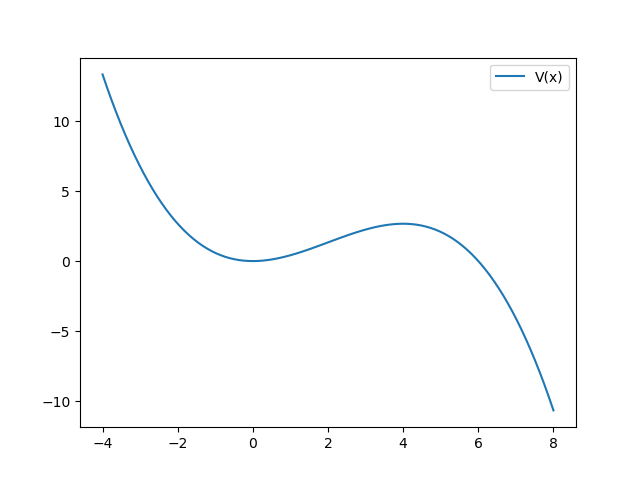

In [28]:
k=1
α=0.25
x=np.linspace(-4,8,100)

def V(x):
    return 0.5*k*(x**2)*(1-(2/3)*(α*x))



%matplotlib notebook
plt.figure()
plt.plot(x, V(x),label="V(x)")
plt.legend()

For the same $k$ and $\alpha$ values as above, **solve this ODE** with initial conditions $x = -1.9$, $v = 0$, considering a large enough time range to see at least three complete oscillations. **Plot $x$ as a function of $t$.** What do you notice about the shape of this curve? Is it what you expect?

<IPython.core.display.Javascript object>


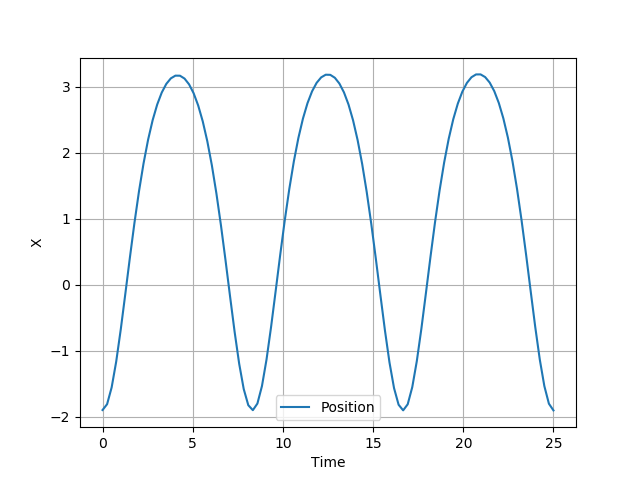

In [39]:
α =0.25
x=-1.9
v=0
time=np.arange(0,100,0.2)
#time=np.array(time)

x0=x,v
x0=np.array(x0)

def differential(t,x):
    x1,x2=x
    dx1dt=x2
    dx2dt=-k*x1*(1-(α *x1))
    return dx1dt,dx2dt

solution=solve_ivp(differential,(0,25),(-1.9,0),t_eval=np.linspace(0,25,100))

%matplotlib notebook
plt.figure()
plt.grid()
plt.xlabel('Time')
plt.ylabel('X')
plt.plot(solution.t, solution.y[0,:],label="Position")
plt.legend()




On the same axes, **plot the solution for the same initial conditions and value of $k$, but with $\alpha$ ranging from 0 to 0.3 in steps of 0.05.** How, qualitatively, does $\alpha$ affect the amplitude and period of oscillation?

<IPython.core.display.Javascript object>


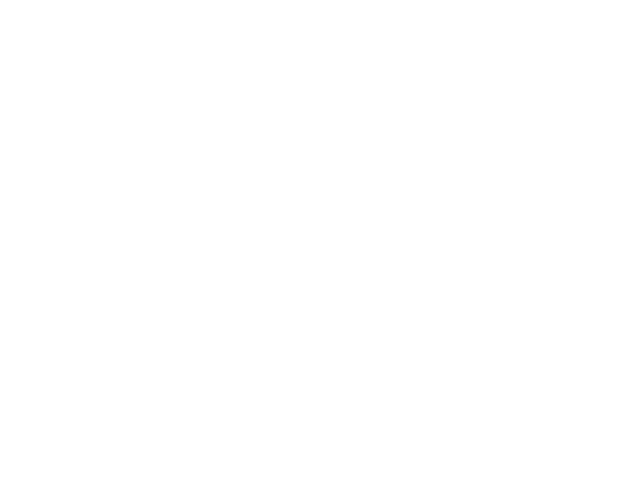

<IPython.core.display.Javascript object>


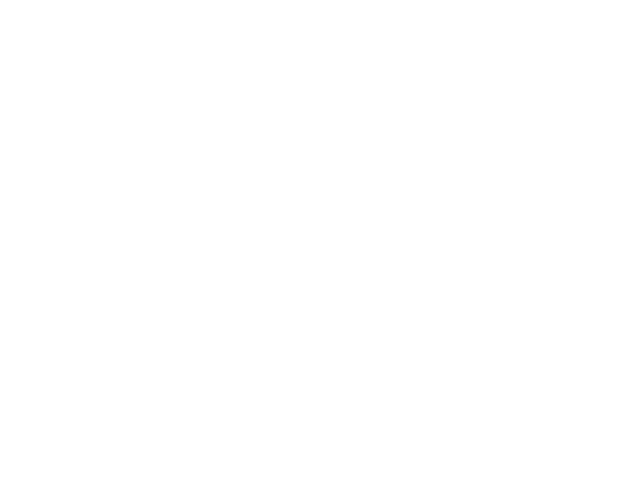

<IPython.core.display.Javascript object>


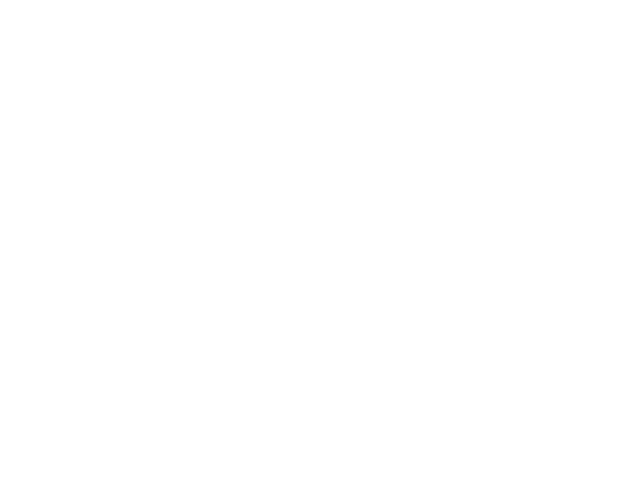

<IPython.core.display.Javascript object>


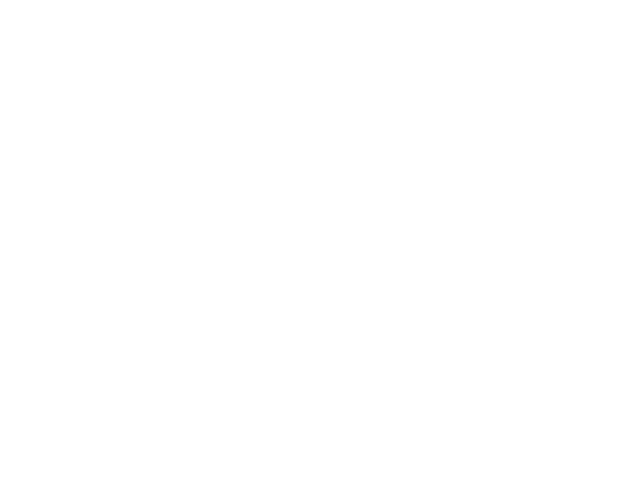

<IPython.core.display.Javascript object>


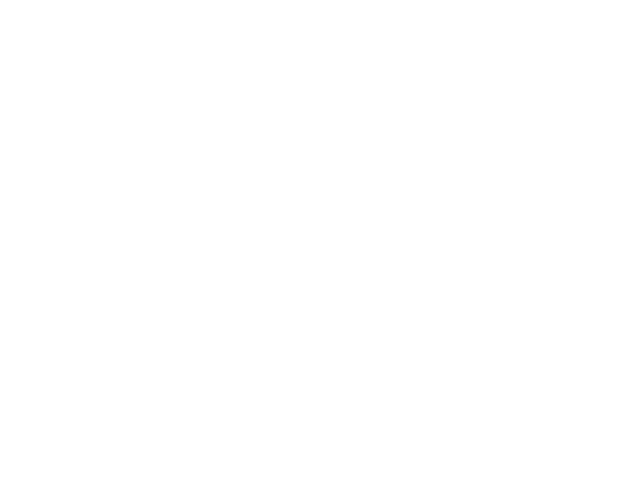

<IPython.core.display.Javascript object>


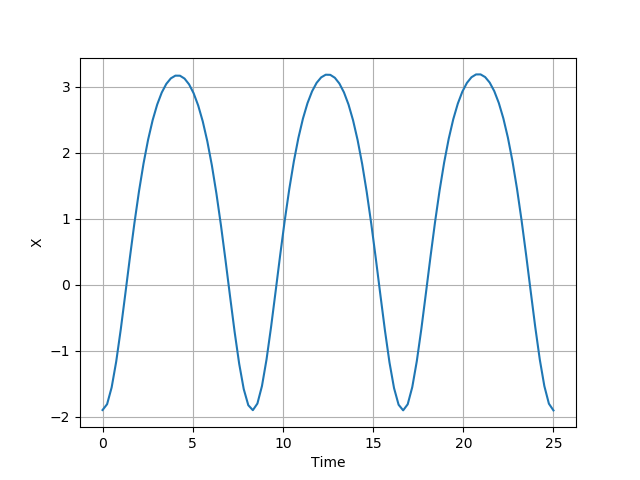

In [43]:
k=1

for i in (np.arange(0,0.3,0.05)):
    α=i
    x=-1.9
    v=0
    #print(α)
    
    x0=(x,v)
    x0=np.array(x0)
    time=np.arange(0,100,0.2)
    
    solution=solve_ivp(differential,(0,25),(-1.9,0),t_eval=np.linspace(0,25,100))

    %matplotlib notebook
    plt.figure()
    plt.grid()
    plt.xlabel('Time')
    plt.ylabel('X')
    plt.plot(solution.t, solution.y[0,:])

    

To make this more quantitative, devise a method to **find the first minimum of each of the curves** in that plot – that is, the period of oscillation. **Plot the period $\tau$ as a function of $\alpha$.**

*Hint:* use the `numpy.argmin` function to find the index of the minimum value of $x$, then look up this index in the $t$ array.

In [25]:

for i in (np.arange(0,0.3,0.05)): 
    α=i
    x=-1.9
    v=0 
    
    x0=x,v
    x0=np.array(x0)
    
    time=np.arange(0,100,0.1)


plt.figure()
plt.plot()  
plt.xlabel('Alpha,α') 
plt.ylabel('Tau,τ')
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (0,) and (1000,)

In a similar way, setting $\alpha$ back to $\tfrac14$, **plot solutions on the same axes for initial $x$ values between $0$ and $-2$.** **Plot the period $\tau$ as a function of $x_0$** and hence show that, unlike the harmonic oscillator, this anharmonic oscillator is *not isochronous*, that is, the period $\tau$ depends on the amplitude of oscillation.

▶ **CHECKPOINT 1**

## Anharmonic oscillator, version 2: symmetrical potential

An alternative anharmonic potential has no harmonic (second-order) term at all; instead, the leading term is of even order $p \geq 4$.

$$\begin{align}
V(x) &= \frac kp x^p \\
F(x) &= -\frac{\mathrm dV}{\mathrm dx} = -kx^{p-1} \\
m\frac{\mathrm d^2x}{\mathrm dt^2} &= -kx^{p-1}
\end{align}$$

**Plot $V(x)$ for $p = 2, 4, 6$.**

**Solve this ODE** for the starting conditions $x = -1.5$, $v = 0$, with $k = 1$ and taking even values of $p$ from 2 to 12. **Plot your solutions**, showing $x$ as a function of time.

Now hold $p = 6$ constant and **plot the solution for a range of initial values of $x$**. Show that, again, an anharmonic oscillator is not isochronous.

▶ **CHECKPOINT 2**

##  Driven oscillations and resonance

We now consider the possibility that the force might depend on $t$ as well as $x$. Specifically, we consider the case of an oscillator "driven" (or "forced") at a particular angular frequency $\omega$:

$$\begin{align}
V(x) &= \frac kp x^p \\
F(t, x) &= -\frac{\mathrm dV}{\mathrm dx} + F(t) = -kx^{p-1} + A\sin(\omega t)\\
m\frac{\mathrm d^2x}{\mathrm dt^2} &= -kx^{p-1} + A\sin(\omega t)
\end{align}$$

To start with, **solve this new equation** for $k = 1$, $p = 2$, $A = 1$, and $\omega$ distributed between 0.1 and 10. As always, **plot your results.** What do you notice about the amplitude of the oscillations?

The phenomenon that you have observed is called *resonance*. Investigate it by **plotting the amplitude of oscillation against the frequency on a log-log plot**, for frequencies $\omega$ between about 0.01 and 30, and for $p = 2, 4, 6, 8, 10$ (as different curves on the same axes), keeping the other parameters the same. What do you notice about the strength and frequency of the resonance peak?

▶ **CHECKPOINT 3**

**Extension:** investigate the oscillation patterns of the nonlinear oscillators near their resonant frequencies (that is, at frequencies near the peak in the previous graph). Can you explain what is happening?

In [ ]:
    time =  np.arange(0,20,0.1)
    #important_time = np.logical_and(5 < time, time < 10)
    



    #x1 = odeint(differential,x0,time) 
    #x1.transpose() 
    
    #x_position = x1[important_time,0] 

    #mins = np.argmin(x_position) 
    #α_x.append(mins)

    #dummy_add = time[important_time][mins] 
    #α_time.append(dummy_add)
    
    
plt.figure() 
plt.plot(time,α_time, label = 'Points')  
plt.xlabel('Alpha,α') 
plt.ylabel('Tau,τ')
